<a href="https://colab.research.google.com/github/EsterSaravia/Hipotese/blob/main/Laboratoria_Hipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introdução** Neste estudo, investigamos cinco hipóteses levantadas por Spotify, relacionadas a características musicais, presença em playlists e comparação entre plataformas de streaming.

In [1]:
# importar pandas e tabelas
import pandas as pd
spotify = pd.read_csv('/content/track_in_spotify - spotify.csv')
competition = pd.read_csv('/content/track_in_competition - competition.csv')
technical = pd.read_csv('/content/track_technical_info - technical_info.csv')

In [2]:
#Verificar os primeiros registros de cada uma
print("Spotify")
print(spotify.head())
print("\nComtetition")
print(competition.head())
print("Technical")
print(technical.head())


Spotify
  track_id                           track_name    artist(s)_name  \
0  4082370  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook   
1  6247887                                 LALA       Myke Towers   
2  6974739                              vampire    Olivia Rodrigo   
3  2362023                         Cruel Summer      Taylor Swift   
4  4386478                       WHERE SHE GOES         Bad Bunny   

   artist_count  released_year  released_month  released_day  \
0             2           2023               7            14   
1             1           2023               3            23   
2             1           2023               6            30   
3             1           2019               8            23   
4             1           2023               5            18   

   in_spotify_playlists  in_spotify_charts    streams  
0                   553                147  141381703  
1                  1474                 48  133716286  
2                  1397 

In [3]:
# Verificar informações sobre os dados
print("Spotify Info:")
print(spotify.info())
print("\nCompetition Info:")
print(competition.info())
print("\nTechnical Info:")
print(technical.info())

Spotify Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_id              953 non-null    object
 1   track_name            953 non-null    object
 2   artist(s)_name        953 non-null    object
 3   artist_count          953 non-null    int64 
 4   released_year         953 non-null    int64 
 5   released_month        953 non-null    int64 
 6   released_day          953 non-null    int64 
 7   in_spotify_playlists  953 non-null    int64 
 8   in_spotify_charts     953 non-null    int64 
 9   streams               953 non-null    object
dtypes: int64(6), object(4)
memory usage: 74.6+ KB
None

Competition Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0  

In [4]:
# Unir os DataFrames usando o track_id como chave de junção
merged = pd.merge(spotify, competition, on='track_id')
merged = pd.merge(merged, technical, on='track_id')


In [5]:
# Remover colunas key, mode, shazam por ter nulos e estar foro do escopo de analise
merged = merged.drop(['key', 'mode', 'in_shazam_charts'], axis=1)

# Verificar se as colunas foi eliminada com sucesso
print(merged.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_id              953 non-null    object
 1   track_name            953 non-null    object
 2   artist(s)_name        953 non-null    object
 3   artist_count          953 non-null    int64 
 4   released_year         953 non-null    int64 
 5   released_month        953 non-null    int64 
 6   released_day          953 non-null    int64 
 7   in_spotify_playlists  953 non-null    int64 
 8   in_spotify_charts     953 non-null    int64 
 9   streams               953 non-null    object
 10  in_apple_playlists    953 non-null    int64 
 11  in_apple_charts       953 non-null    int64 
 12  in_deezer_playlists   953 non-null    object
 13  in_deezer_charts      953 non-null    int64 
 14  bpm                   953 non-null    int64 
 15  danceability_%        953 non-null    in

In [6]:
# Remover linhas com valores não numéricos na coluna streams
merged = merged[pd.to_numeric(merged['streams'], errors='coerce').notnull()]

# Converter a coluna streams para int64
merged['streams'] = merged['streams'].astype(int)

# Verificar se a coluna streams foi convertida com sucesso
print(merged.info())

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_id              952 non-null    object
 1   track_name            952 non-null    object
 2   artist(s)_name        952 non-null    object
 3   artist_count          952 non-null    int64 
 4   released_year         952 non-null    int64 
 5   released_month        952 non-null    int64 
 6   released_day          952 non-null    int64 
 7   in_spotify_playlists  952 non-null    int64 
 8   in_spotify_charts     952 non-null    int64 
 9   streams               952 non-null    int64 
 10  in_apple_playlists    952 non-null    int64 
 11  in_apple_charts       952 non-null    int64 
 12  in_deezer_playlists   952 non-null    object
 13  in_deezer_charts      952 non-null    int64 
 14  bpm                   952 non-null    int64 
 15  danceability_%        952 non-null    int64 


<ipython-input-6-075bd15200b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['streams'] = merged['streams'].astype(int)


In [7]:
# Converter a coluna deezer playlists para int64
merged['in_deezer_playlists'] = merged['in_deezer_playlists'].str.replace(',', '').astype(int)
# Verificar se a coluna deezer playlists foi convertida com sucesso
print(merged.info())

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_id              952 non-null    object
 1   track_name            952 non-null    object
 2   artist(s)_name        952 non-null    object
 3   artist_count          952 non-null    int64 
 4   released_year         952 non-null    int64 
 5   released_month        952 non-null    int64 
 6   released_day          952 non-null    int64 
 7   in_spotify_playlists  952 non-null    int64 
 8   in_spotify_charts     952 non-null    int64 
 9   streams               952 non-null    int64 
 10  in_apple_playlists    952 non-null    int64 
 11  in_apple_charts       952 non-null    int64 
 12  in_deezer_playlists   952 non-null    int64 
 13  in_deezer_charts      952 non-null    int64 
 14  bpm                   952 non-null    int64 
 15  danceability_%        952 non-null    int64 


In [8]:
# Somar as colunas de playlists
merged['total_playlists'] = merged['in_spotify_playlists'] + merged['in_apple_playlists'] + merged['in_deezer_playlists']

# Juntar as colunas de released_year, released_month e released_day em uma nova coluna data_lancamento
merged['data_lancamento'] = merged['released_year'].astype(str) + '-' + merged['released_month'].astype(str) + '-' + merged['released_day'].astype(str)

# Verificar se a nova coluna foi criada corretamente
print(merged.info())


<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_id              952 non-null    object
 1   track_name            952 non-null    object
 2   artist(s)_name        952 non-null    object
 3   artist_count          952 non-null    int64 
 4   released_year         952 non-null    int64 
 5   released_month        952 non-null    int64 
 6   released_day          952 non-null    int64 
 7   in_spotify_playlists  952 non-null    int64 
 8   in_spotify_charts     952 non-null    int64 
 9   streams               952 non-null    int64 
 10  in_apple_playlists    952 non-null    int64 
 11  in_apple_charts       952 non-null    int64 
 12  in_deezer_playlists   952 non-null    int64 
 13  in_deezer_charts      952 non-null    int64 
 14  bpm                   952 non-null    int64 
 15  danceability_%        952 non-null    int64 


In [9]:
# Remover colunas de datas e playlists, foro escopo
merged = merged.drop(['released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists'], axis=1)

# Verificar se as colunas foi eliminada com sucesso
print(merged.info())

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   track_id            952 non-null    object
 1   track_name          952 non-null    object
 2   artist(s)_name      952 non-null    object
 3   artist_count        952 non-null    int64 
 4   in_spotify_charts   952 non-null    int64 
 5   streams             952 non-null    int64 
 6   in_apple_charts     952 non-null    int64 
 7   in_deezer_charts    952 non-null    int64 
 8   bpm                 952 non-null    int64 
 9   danceability_%      952 non-null    int64 
 10  valence_%           952 non-null    int64 
 11  energy_%            952 non-null    int64 
 12  acousticness_%      952 non-null    int64 
 13  instrumentalness_%  952 non-null    int64 
 14  liveness_%          952 non-null    int64 
 15  speechiness_%       952 non-null    int64 
 16  total_playlists     952 non-nul

**Teste Shapiro-Wilk**  é uma ferramenta estatística utilizada para verificar se uma determinada amostra de dados segue uma distribuição normal

In [10]:
#A hipótese nula do teste de Shapiro-Wilk é que os dados são provenientes de uma distribuição normal.
#Se o valor-p for menor que um nível de significância escolhido (por exemplo, 0.05), rejeitamos a hipótese nula e concluímos que os dados não são normalmente distribuídos.
from scipy.stats import shapiro #importar teste

# teste de normalidade para o BPM
stat, p_value = shapiro(merged['bpm'])
print("Teste de Shapiro-Wilk para BPM:")
print("Estatística de teste:", stat)
print("P-value:", p_value)

# teste de normalidade para o STREAMS
stat, p_value = shapiro(merged['streams'])
print("\nTeste de Shapiro-Wilk para STREAMS:")
print("Estatística de teste:", stat)
print("P-value:", p_value)

# teste de normalidade para o TOTAL PLAYLISTS
stat, p_value = shapiro(merged['total_playlists'])
print("\nTeste de Shapiro-Wilk para TOTAL PLAYLISTS:")
print("Estatística de teste:", stat)
print("P-value:", p_value)

# teste de normalidade para o SPOPTIFY CHARTS
stat, p_value = shapiro(merged['in_spotify_charts'])
print("\nTeste de Shapiro-Wilk para SPOTIFY CHARTS:")
print("Estatística de teste:", stat)
print("P-value:", p_value)

# teste de normalidade para o DEEZER CHARTS
stat, p_value = shapiro(merged['in_deezer_charts'])
print("\nTeste de Shapiro-Wilk para DEEZER CHARTS:")
print("Estatística de teste:", stat)
print("P-value:", p_value)

# teste de normalidade para o APPLE CHARTS
stat, p_value = shapiro(merged['in_apple_charts'])
print("\nTeste de Shapiro-Wilk para APPLE CHARTS:")
print("Estatística de teste:", stat)
print("P-value:", p_value)

# teste de normalidade para o DANCE
stat, p_value = shapiro(merged['danceability_%'])
print("\nTeste de Shapiro-Wilk para DANCE:")
print("Estatística de teste:", stat)
print("P-value:", p_value)

# teste de normalidade para o ENERGY
stat, p_value = shapiro(merged['energy_%'])
print("\nTeste de Shapiro-Wilk para ENERGY:")
print("Estatística de teste:", stat)
print("P-value:", p_value)
# teste de normalidade para o VALENCE
stat, p_value = shapiro(merged['valence_%'])
print("\nTeste de Shapiro-Wilk para VALENCE:")
print("Estatística de teste:", stat)
print("P-value:", p_value)

# teste de normalidade para o VIVACIDADE
stat, p_value = shapiro(merged['liveness_%'])
print("\nTeste de Shapiro-Wilk para VIVACIDADE:")
print("Estatística de teste:", stat)
print("P-value:", p_value)

# teste de normalidade para o INTRUMENTAL
stat, p_value = shapiro(merged['instrumentalness_%'])
print("\nTeste de Shapiro-Wilk para INTRUMENTAL:")
print("Estatística de teste:", stat)
print("P-value:", p_value)

# teste de normalidade para o ACOUSTIC
stat, p_value = shapiro(merged['acousticness_%'])
print("\nTeste de Shapiro-Wilk para ACOUTIC:")
print("Estatística de teste:", stat)
print("P-value:", p_value)

# teste de normalidade para o SPEECH
stat, p_value = shapiro(merged['speechiness_%'])
print("\nTeste de Shapiro-Wilk para SPEECH:")
print("Estatística de teste:", stat)
print("P-value:", p_value)


Teste de Shapiro-Wilk para BPM:
Estatística de teste: 0.9775465726852417
P-value: 5.980395345606127e-11

Teste de Shapiro-Wilk para STREAMS:
Estatística de teste: 0.7614117860794067
P-value: 5.759937816269185e-35

Teste de Shapiro-Wilk para TOTAL PLAYLISTS:
Estatística de teste: 0.6046674847602844
P-value: 5.301112090540783e-42

Teste de Shapiro-Wilk para SPOTIFY CHARTS:
Estatística de teste: 0.6660088300704956
P-value: 1.4074767892540252e-39

Teste de Shapiro-Wilk para DEEZER CHARTS:
Estatística de teste: 0.5040716528892517
P-value: 2.802596928649634e-45

Teste de Shapiro-Wilk para APPLE CHARTS:
Estatística de teste: 0.8842672109603882
P-value: 4.671673415615302e-26

Teste de Shapiro-Wilk para DANCE:
Estatística de teste: 0.979579508304596
P-value: 2.730024539765452e-10

Teste de Shapiro-Wilk para ENERGY:
Estatística de teste: 0.980632483959198
P-value: 6.22100149172411e-10

Teste de Shapiro-Wilk para VALENCE:
Estatística de teste: 0.9775364398956299
P-value: 5.93662619063906e-11

Tes

In [11]:
# Dados dos testes de normalidad
data = {
    'Variável': ['BPM', 'STREAMS', 'TOTAL PLAYLISTS', 'SPOTIFY CHARTS', 'DEEZER CHARTS', 'APPLE CHARTS',
                  'DANCE', 'ENERGY', 'VALENCE', 'VIVACIDADE', 'INTRUMENTAL', 'ACOUTIC', 'SPEECH'],
    'Estatística de teste': [0.9775465726852417, 0.7614117860794067, 0.6046674847602844, 0.6660088300704956,
                              0.5040716528892517, 0.8842672109603882, 0.979579508304596, 0.980632483959198,
                              0.9775364398956299, 0.7713897824287415, 0.1887657642364502, 0.8715689778327942,
                              0.7143450379371643],
    'P-value': [5.980395345606127e-11, 5.759937816269185e-35, 5.301112090540783e-42, 1.4074767892540252e-39,
                2.802596928649634e-45, 4.671673415615302e-26, 2.730024539765452e-10, 6.22100149172411e-10,
                5.93662619063906e-11, 2.1125086781003207e-34, 0.0, 2.9668207384326835e-27, 2.1328612374412482e-37]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Mostrar tabela
print(df)


           Variável  Estatística de teste       P-value
0               BPM              0.977547  5.980395e-11
1           STREAMS              0.761412  5.759938e-35
2   TOTAL PLAYLISTS              0.604667  5.301112e-42
3    SPOTIFY CHARTS              0.666009  1.407477e-39
4     DEEZER CHARTS              0.504072  2.802597e-45
5      APPLE CHARTS              0.884267  4.671673e-26
6             DANCE              0.979580  2.730025e-10
7            ENERGY              0.980632  6.221001e-10
8           VALENCE              0.977536  5.936626e-11
9        VIVACIDADE              0.771390  2.112509e-34
10      INTRUMENTAL              0.188766  0.000000e+00
11          ACOUTIC              0.871569  2.966821e-27
12           SPEECH              0.714345  2.132861e-37


**O teste de Mann-Whitney U**
é utilizado para comparar as médias de duas amostras independentes quando os dados não seguem uma distribuição normal.

**Hipótese 1: Músicas com BPM mais altos fazem mais sucesso em termos de número de streams no Spotify**

In [12]:
#É usado no cálculo do valor-p. u-stat, este valor indica a soma dos postos das observações na amostra.
#p-value Este valor indica a probabilidade de observar os dados amostrais se a hipótese nula (de que não há diferença significativa entre os grupos) for verdadeira.
from scipy.stats import mannwhitneyu #importar o teste mann

# Separar os dados em duas amostras com base no quartil de BPM e os compara com STREAMS
bpm_high_streams = merged[merged['bpm'] > merged['bpm'].quantile(0.75)]['streams']
bpm_low_streams = merged[merged['bpm'] <= merged['bpm'].quantile(0.25)]['streams']

# Aplicar o teste de Wilcoxon
u_stat, p_value = mannwhitneyu(bpm_high_streams, bpm_low_streams)
print("Hipótese 1 - Músicas com BPM mais altos fazem mais sucesso:")
print("U-statistic:", u_stat)
print("P-value:", p_value)


Hipótese 1 - Músicas com BPM mais altos fazem mais sucesso:
U-statistic: 28884.0
P-value: 0.7082552253173148


**Hipótese 5 - As características da música influenciam o sucesso em termos de número de streams no Spotify**

In [13]:
from scipy.stats import mannwhitneyu

# Separar os dados em dois grupos com base no quartil de danceability
low_danceability_streams = merged[merged['danceability_%'] <= merged['danceability_%'].quantile(0.25)]['streams']
high_danceability_streams = merged[merged['danceability_%'] > merged['danceability_%'].quantile(0.75)]['streams']
# Aplicar o teste de Mann-Whitney U
u_stat, p_value = mannwhitneyu(low_danceability_streams, high_danceability_streams)
print("Hipótese 5 - Influência da danceability no número de streams:")
print("U-statistic:", u_stat)
print("P-value:", p_value)

# Separar os dados em dois grupos com base no quartil de energy
low_energy_streams = merged[merged['energy_%'] <= merged['energy_%'].quantile(0.25)]['streams']
high_energy_streams = merged[merged['energy_%'] > merged['energy_%'].quantile(0.75)]['streams']
# Aplicar o teste de Mann-Whitney U
u_stat, p_value = mannwhitneyu(low_energy_streams, high_energy_streams)
print("Hipótese 5 - Influência da energy no número de streams:")
print("U-statistic:", u_stat)
print("P-value:", p_value)

# Separar os dados em dois grupos com base no quartil de valence
low_valence_streams = merged[merged['valence_%'] <= merged['valence_%'].quantile(0.25)]['streams']
high_valence_streams = merged[merged['valence_%'] > merged['valence_%'].quantile(0.75)]['streams']
# Aplicar o teste de Mann-Whitney U
u_stat, p_value = mannwhitneyu(low_valence_streams, high_valence_streams)
print("Hipótese 5 - Influência da valence no número de streams:")
print("U-statistic:", u_stat)
print("P-value:", p_value)

# Separar os dados em dois grupos com base no quartil de liveness
low_liveness_streams = merged[merged['liveness_%'] <= merged['liveness_%'].quantile(0.25)]['streams']
high_liveness_streams = merged[merged['liveness_%'] > merged['liveness_%'].quantile(0.75)]['streams']
# Aplicar o teste de Mann-Whitney U
u_stat, p_value = mannwhitneyu(low_liveness_streams, high_liveness_streams)
print("Hipótese 5 - Influência da liveness no número de streams:")
print("U-statistic:", u_stat)
print("P-value:", p_value)

# Separar os dados em dois grupos com base no quartil de instrumental
low_instrumentalness_streams = merged[merged['instrumentalness_%'] <= merged['instrumentalness_%'].quantile(0.25)]['streams']
high_instrumentalness_streams = merged[merged['instrumentalness_%'] > merged['instrumentalness_%'].quantile(0.75)]['streams']
# Aplicar o teste de Mann-Whitney U
u_stat, p_value = mannwhitneyu(low_instrumentalness_streams, high_instrumentalness_streams)
print("Hipótese 5 - Influência da instrumentalness no número de streams:")
print("U-statistic:", u_stat)
print("P-value:", p_value)

# Separar os dados em dois grupos com base no quartil de acousticness
low_acousticness_streams = merged[merged['acousticness_%'] <= merged['acousticness_%'].quantile(0.25)]['streams']
high_acousticness_streams = merged[merged['acousticness_%'] > merged['acousticness_%'].quantile(0.75)]['streams']
# Aplicar o teste de Mann-Whitney U
u_stat, p_value = mannwhitneyu(low_acousticness_streams, high_acousticness_streams)
print("Hipótese 5 - Influência da acousticness no número de streams:")
print("U-statistic:", u_stat)
print("P-value:", p_value)

# Separar os dados em dois grupos com base no quartil de speechiness
low_speechiness_streams = merged[merged['speechiness_%'] <= merged['speechiness_%'].quantile(0.25)]['streams']
high_speechiness_streams = merged[merged['speechiness_%'] > merged['speechiness_%'].quantile(0.75)]['streams']
# Aplicar o teste de Mann-Whitney U
u_stat, p_value = mannwhitneyu(low_speechiness_streams, high_speechiness_streams)
print("Hipótese 5 - Influência da speechiness no número de streams:")
print("U-statistic:", u_stat)
print("P-value:", p_value)


Hipótese 5 - Influência da danceability no número de streams:
U-statistic: 31923.0
P-value: 0.019666858287570033
Hipótese 5 - Influência da energy no número de streams:
U-statistic: 28694.0
P-value: 0.3594543749948407
Hipótese 5 - Influência da valence no número de streams:
U-statistic: 29182.5
P-value: 0.41212519101945555
Hipótese 5 - Influência da liveness no número de streams:
U-statistic: 40162.0
P-value: 0.05013031784488695
Hipótese 5 - Influência da instrumentalness no número de streams:
U-statistic: 37902.0
P-value: 0.9107601922397879
Hipótese 5 - Influência da acousticness no número de streams:
U-statistic: 33007.0
P-value: 0.1107285100198508
Hipótese 5 - Influência da speechiness no número de streams:
U-statistic: 44058.0
P-value: 0.0025200718898734384


**Hipótese 2 - Músicas mais populares no ranking do Spotify também possuem um comportamento semelhante em outras plataformas, como a Deezer e Apple**

In [14]:
from scipy.stats import mannwhitneyu # teste Mann

# Comparação entre o número de streams no Spotify e no Deezer
spotify_streams = merged['streams'][merged['in_spotify_charts'] == True]
deezer_streams = merged['streams'][merged['in_deezer_charts'] == True]
apple_streams = merged['streams'][merged['in_apple_charts'] == True]

# Realizar o teste de Mann-Whitney U
statistic, p_value = mannwhitneyu(spotify_streams, deezer_streams, alternative='two-sided')
print("Hipótese 2 - Comparação entre Spotify e Deezer:")
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
statistic, p_value = mannwhitneyu(spotify_streams, apple_streams, alternative='two-sided')
print("Hipótese 2 - Comparação entre Spotify e Apple:")
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)


Hipótese 2 - Comparação entre Spotify e Deezer:
Mann-Whitney U statistic: 1017.0
P-value: 0.6397585485575235
Hipótese 2 - Comparação entre Spotify e Apple:
Mann-Whitney U statistic: 438.0
P-value: 0.03307601899674792


**Hipótese 3 - A presença de uma música em um maior número de playlists está correlacionada com um maior número de streams**

In [15]:
#o teste de correlaçao Spearman se baseia nas diferenças entre os rankings das duas variáveis.
from scipy.stats import spearmanr #importar teste

# Calcular a correlação de Spearman
correlation, p_value = spearmanr(merged['total_playlists'], merged['streams'])
print("Hipotese 3 - Correlation between total de playlists and streams:", correlation)
print("P-value:", p_value)


Hipotese 3 - Correlation between total de playlists and streams: 0.8326282616802198
P-value: 5.030970551607708e-246


**Hipótese 4 - Artistas com um maior número de músicas no Spotify têm mais streams**

In [16]:
from scipy.stats import mannwhitneyu

# Calcular o número de músicas de cada artista
artist_tracks = merged.groupby('artist(s)_name')['track_id'].count()

# Definir um limiar para o número de músicas que um artista deve ter para ser considerado "muitas músicas"
threshold = 10
many_tracks = artist_tracks[artist_tracks >= threshold].index #muito
few_tracks = artist_tracks[artist_tracks < threshold].index #pouco

# Comparação entre artistas com muitas músicas e artistas com poucas músicas
many_tracks_streams = merged[merged['artist(s)_name'].isin(many_tracks)]['streams']
few_tracks_streams = merged[merged['artist(s)_name'].isin(few_tracks)]['streams']

# Realizar o teste de Mann-Whitney U
statistic, p_value = mannwhitneyu(many_tracks_streams, few_tracks_streams, alternative='two-sided')
print("Hipótese 4 - Comparação entre artistas com muitas músicas e artistas com poucas músicas:")
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)


Hipótese 4 - Comparação entre artistas com muitas músicas e artistas com poucas músicas:
Mann-Whitney U statistic: 47506.0
P-value: 0.013359149245605712


**visualização de Hipóteses**

In [17]:
!pip install tabulate #instalar o pacote

from tabulate import tabulate #importar tabela do pacote tabela

# Hipótese 1
hipotese1 = [
    ["Estatística", "Valor"],
    ["Teste", "Mann-Whitney U"],
    ["U-statistic", 28884.0],
    ["P-value", 0.7083]
]
print("Hipótese 1 - Músicas com BPM mais altos fazem mais sucesso:")
print(tabulate(hipotese1, headers="firstrow"))

# Hipótese 2
hipotese2_deezer = [
    ["Estatística", "Valor"],
    ["Teste", "Mann-Whitney U"],
    ["U-statistic", 1017.0],
    ["P-value", 0.6398]
]
print("\nHipótese 2 - Comparação entre Spotify e Deezer:")
print(tabulate(hipotese2_deezer, headers="firstrow"))
# Hipótese 2
hipotese2_apple = [
    ["Estatística", "Valor"],
    ["Teste", "Mann-Whitney U"],
    ["U-statistic", 438.0],
    ["P-value", 0.0330]
]
print("\nHipótese 2 - Comparação entre Spotify e Apple:")
print(tabulate(hipotese2_apple, headers="firstrow"))

# Hipótese 3
hipotese3 = [
    ["Estatística", "Valor"],
    ["Correlação", 0.8326],
    ["P-value", 5.030970551607708e-246]
]
print("\nHipótese 3 - Correlação entre playlists e streams:")
print(tabulate(hipotese3, headers="firstrow"))

# Hipótese 4
hipotese4 = [
    ["Estatística", "Valor"],
    ["Teste", "Mann-Whitney U"],
    ["U-statistic", 47506.0],
    ["P-value", 0.0134]
]
print("\nHipótese 4 - Artistas com um maior número de músicas têm mais streams:")
print(tabulate(hipotese4, headers="firstrow"))

# Hipótese 5
hipotese5 = [
    ["Característica", "U-statistic", "P-value"],
    ["Danceability", 31923.0, 0.0197],
    ["Energy", 28694.0, 0.3595],
    ["Valence", 29182.5, 0.4121],
    ["Liveness", 40162.0, 0.0501],
    ["Instrumentalness", 37902.0, 0.9108],
    ["Acousticness", 33007.0, 0.1107],
    ["Speechiness", 44058.0, 0.0025]
]
print("\nHipótese 5 - Influência das características da música no número de streams:")
print(tabulate(hipotese5, headers="firstrow"))


Hipótese 1 - Músicas com BPM mais altos fazem mais sucesso:
Estatística    Valor
-------------  --------------
Teste          Mann-Whitney U
U-statistic    28884.0
P-value        0.7083

Hipótese 2 - Comparação entre Spotify e Deezer:
Estatística    Valor
-------------  --------------
Teste          Mann-Whitney U
U-statistic    1017.0
P-value        0.6398

Hipótese 2 - Comparação entre Spotify e Apple:
Estatística    Valor
-------------  --------------
Teste          Mann-Whitney U
U-statistic    438.0
P-value        0.033

Hipótese 3 - Correlação entre playlists e streams:
Estatística           Valor
-------------  ------------
Correlação     0.8326
P-value        5.03097e-246

Hipótese 4 - Artistas com um maior número de músicas têm mais streams:
Estatística    Valor
-------------  --------------
Teste          Mann-Whitney U
U-statistic    47506.0
P-value        0.0134

Hipótese 5 - Influência das características da música no número de streams:
Característica      U-statistic    P

**Grafico de Distribuição: Data de Lançamento e Total de Playlists**

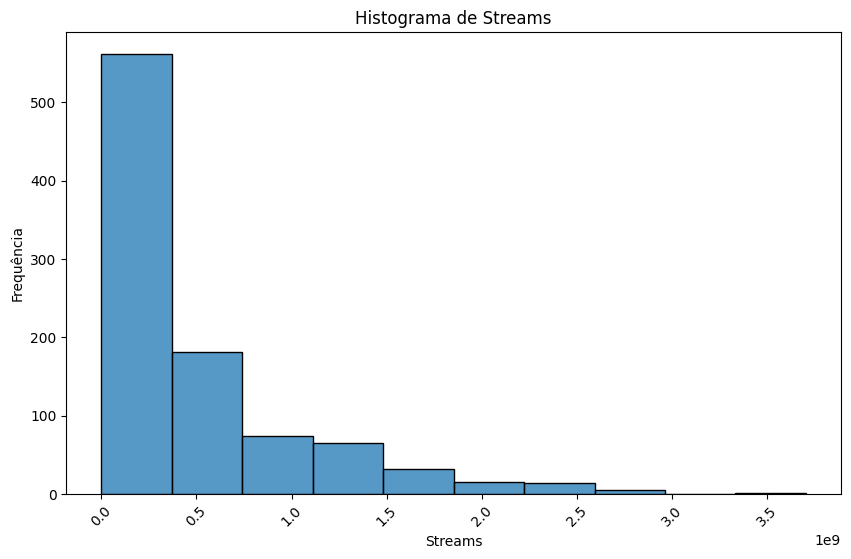

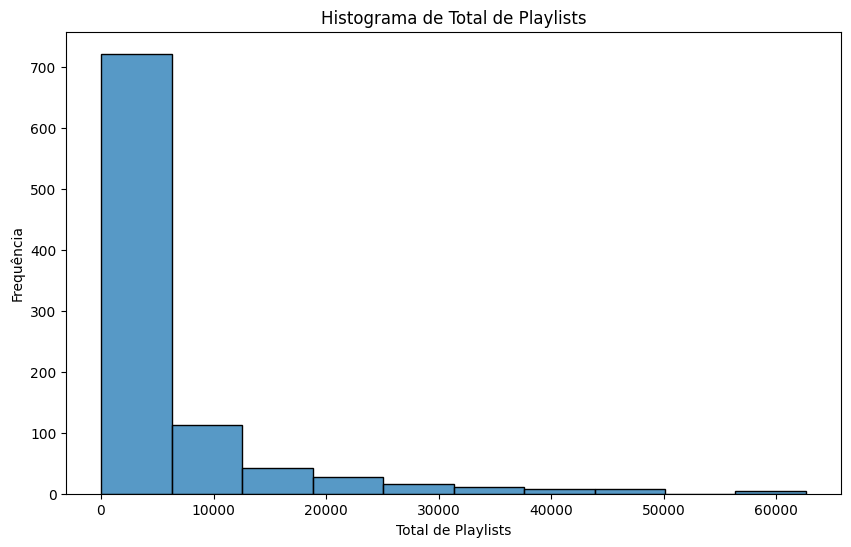

In [19]:
import matplotlib.pyplot as plt #importar grafico
import seaborn as sns #importar grafico

# Histograma para data_lancamento
plt.figure(figsize=(10, 6))
sns.histplot(merged['streams'], bins=10)# grafico
plt.title('Histograma de Streams')
plt.xlabel('Streams')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

# Histograma para total_playlists
plt.figure(figsize=(10, 6))
sns.histplot(merged['total_playlists'], bins=10)
plt.title('Histograma de Total de Playlists')
plt.xlabel('Total de Playlists')
plt.ylabel('Frequência')
plt.show()


**visualização da Hipoteses com Grafico**

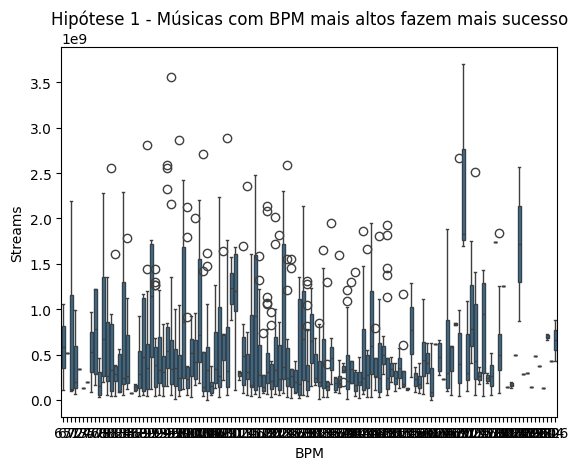

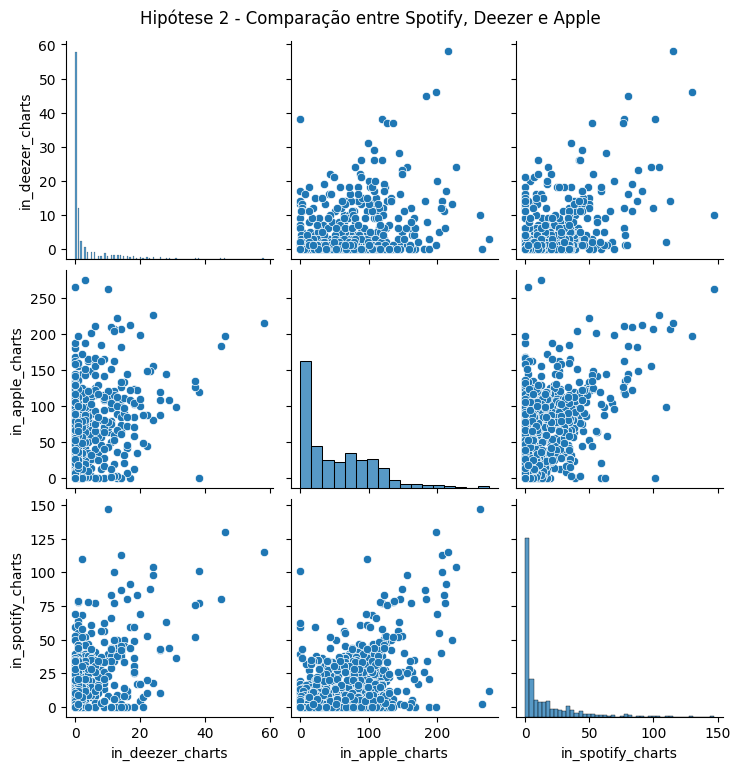

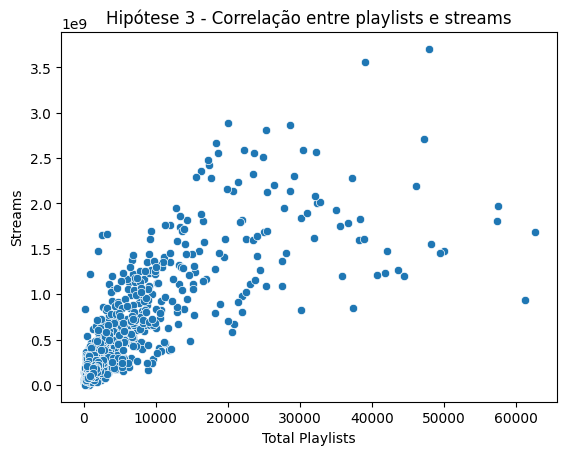

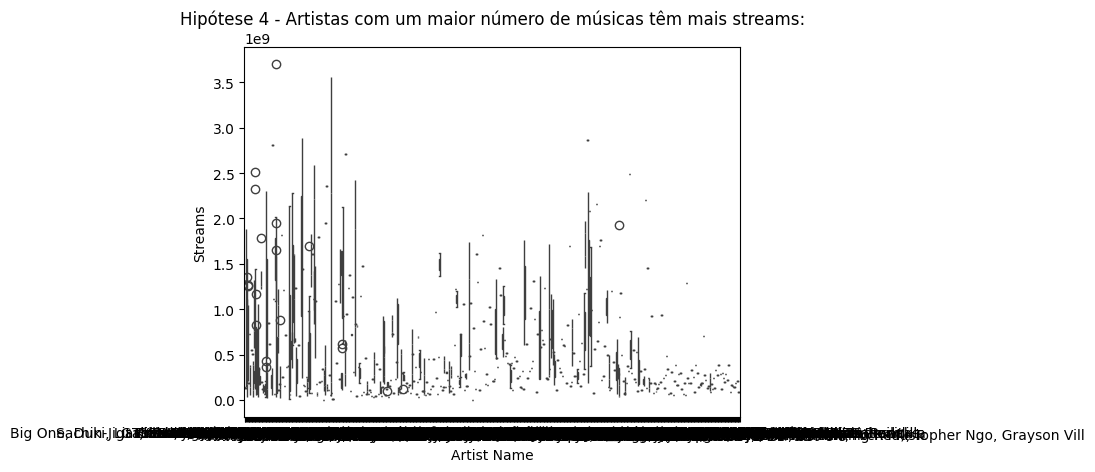

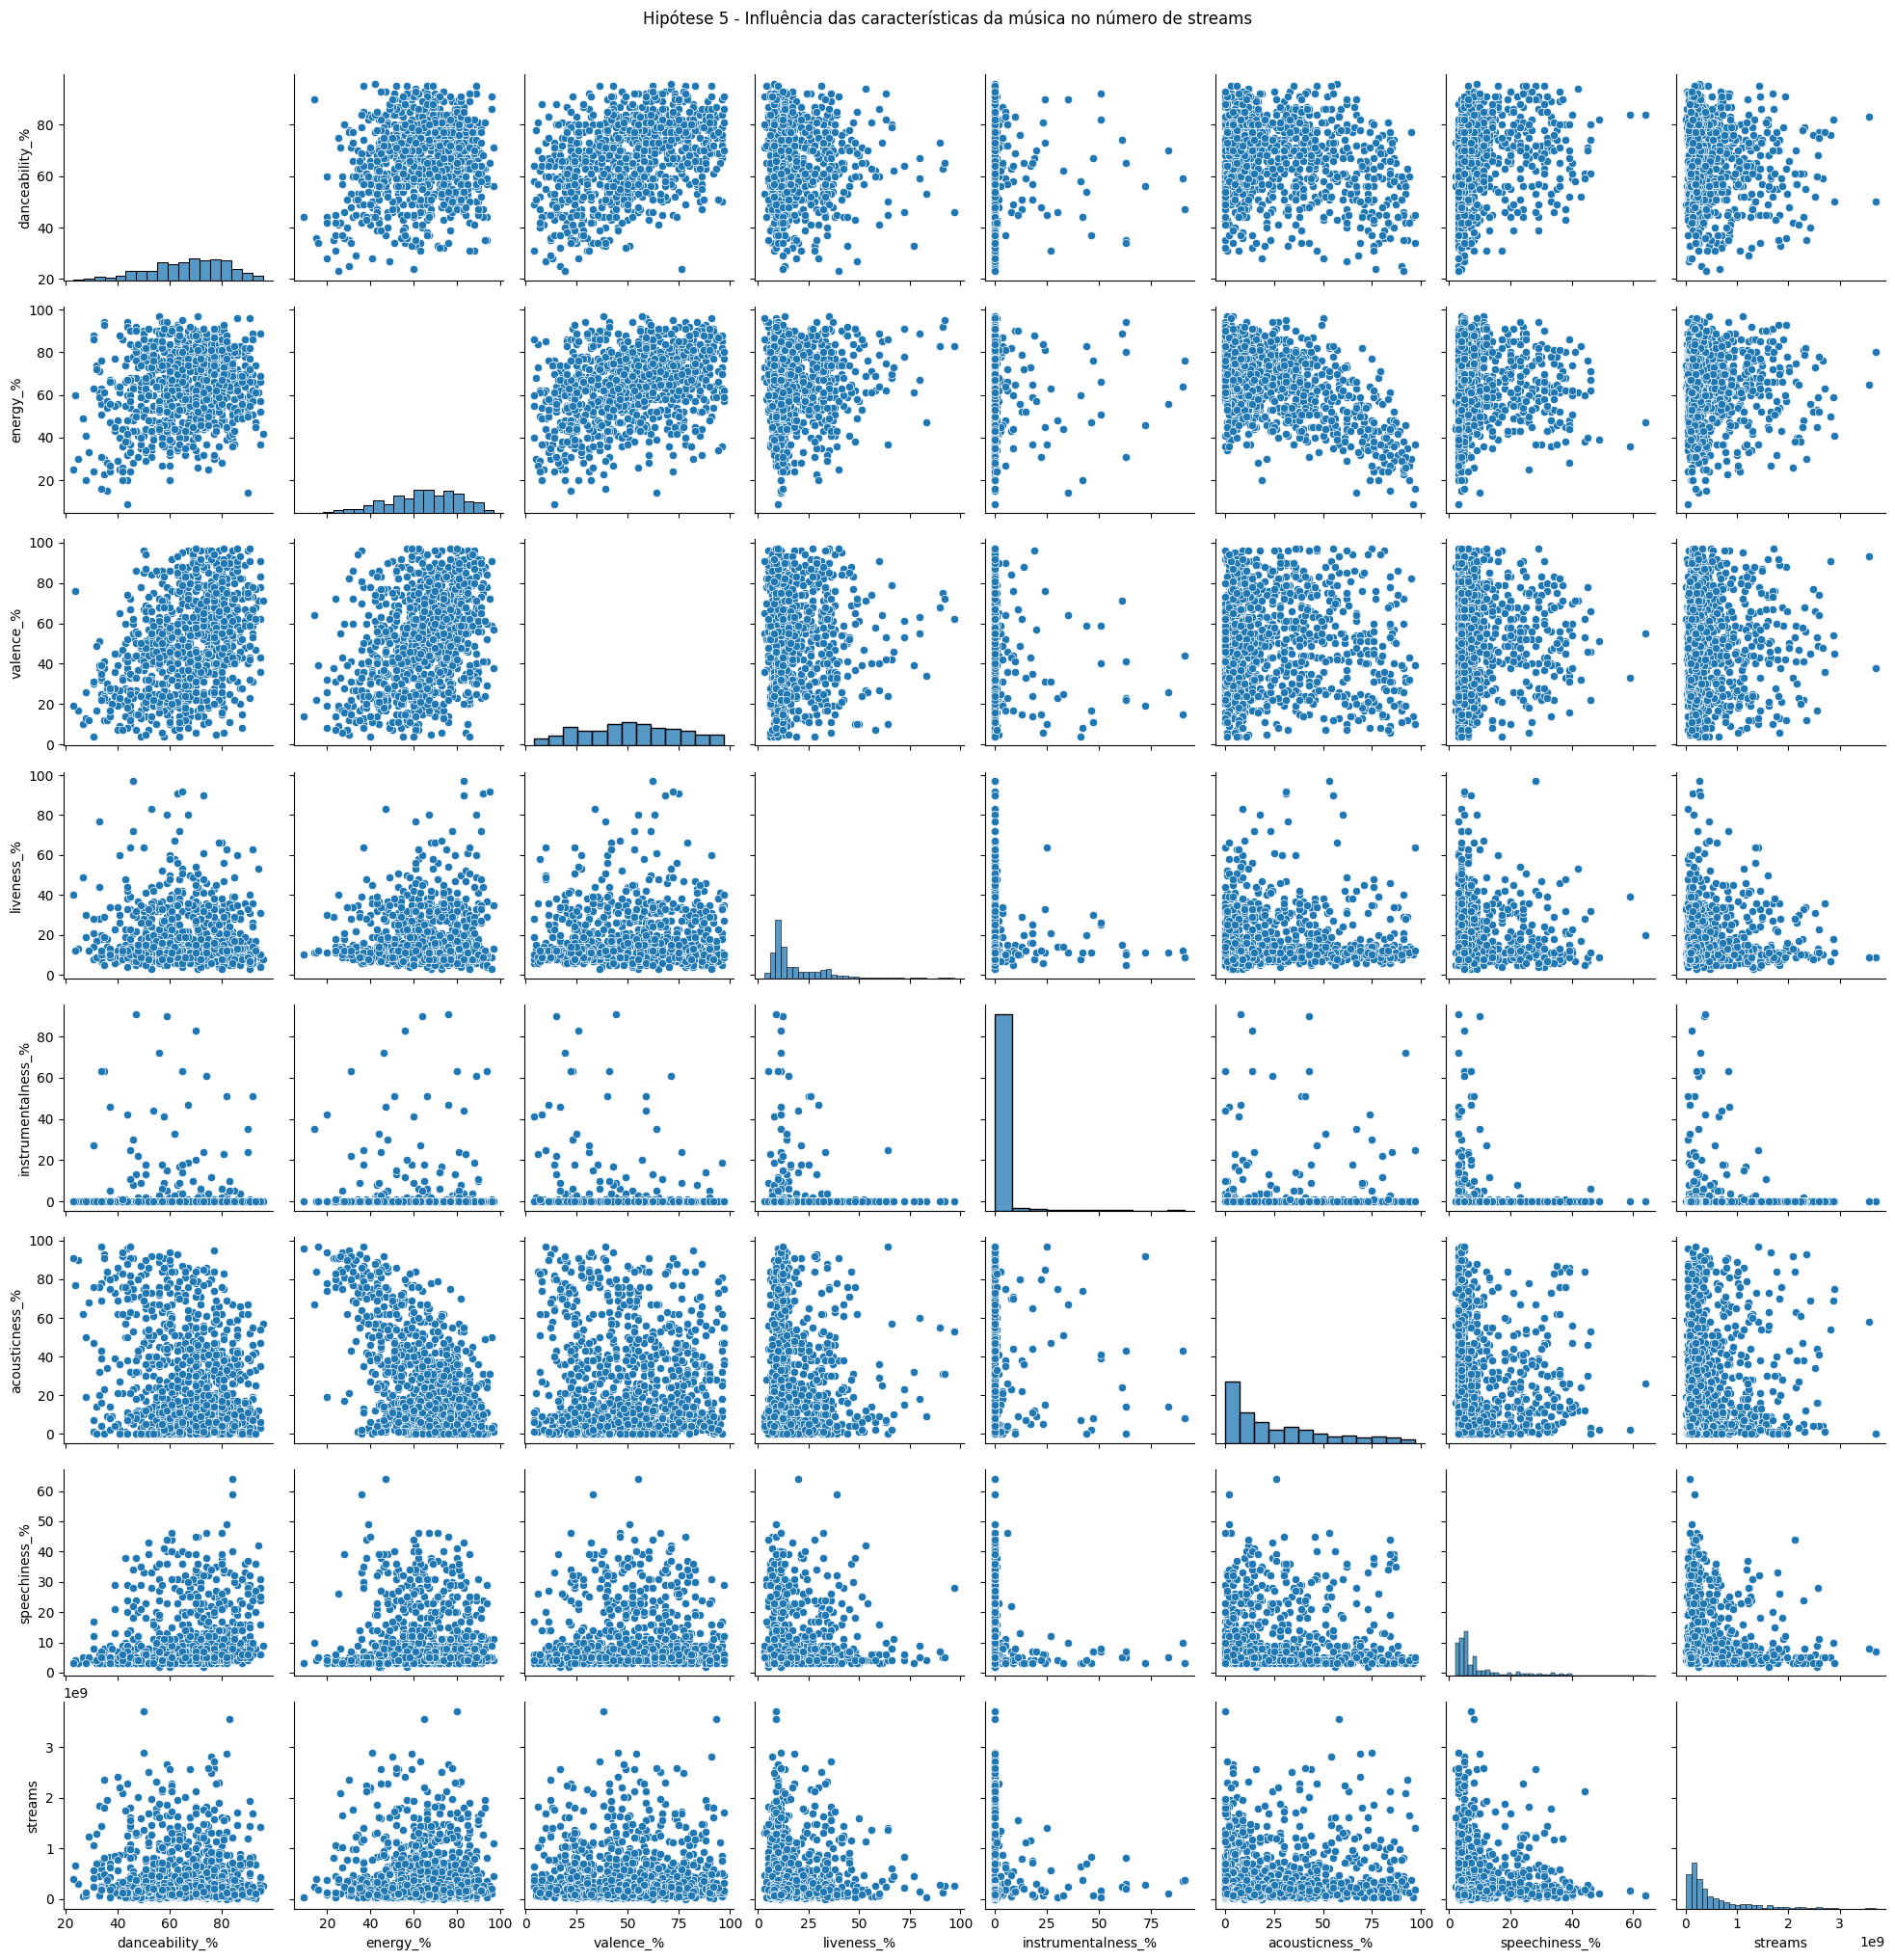

In [ ]:
# Hipótese 1 - Músicas com BPM mais altos fazem mais sucesso
sns.boxplot(x='bpm', y='streams', data=merged)# gráfico de caixa
plt.title('Hipótese 1 - Músicas com BPM mais altos fazem mais sucesso')
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.show()

# Hipótese 2 - Comparação entre Spotify, Deezer e Apple
sns.pairplot(merged[['in_deezer_charts', 'in_apple_charts', 'in_spotify_charts']])# gráfico de pares
plt.suptitle('Hipótese 2 - Comparação entre Spotify, Deezer e Apple', y=1.02)
plt.show()

# Hipótese 3 - Correlação entre playlists e streams
sns.scatterplot(x='total_playlists', y='streams', data=merged)# gráfico de dispersão
plt.title('Hipótese 3 - Correlação entre playlists e streams')
plt.xlabel('Total Playlists')
plt.ylabel('Streams')
plt.show()

# Hipótese 4 - Artistas com um maior número de músicas têm mais streams:
sns.boxplot(x='artist(s)_name', y='streams', data=merged)
plt.title('Hipótese 4 - Artistas com um maior número de músicas têm mais streams:')
plt.xlabel('Artist Name')
plt.ylabel('Streams')
plt.show()

# Hipótese 5 - Influência das características da música no número de streams
sns.pairplot(merged[['danceability_%', 'energy_%', 'valence_%', 'liveness_%', 'instrumentalness_%', 'acousticness_%', 'speechiness_%', 'streams']])
plt.suptitle('Hipótese 5 - Influência das características da música no número de streams', y=1.02)
plt.show()

**Regressão linear**
é utilizada para modelar a relação entre uma variável dependente e uma variáveis independentes, permitindo avaliar o impacto de cada variável independente sobre a variável dependente.

In [20]:
#importa o modelo
import statsmodels.api as sm

# Hipótese 1 - Músicas com BPM mais altos fazem mais sucesso
X = merged['bpm']
Y = merged['streams']
X = sm.add_constant(X)  # Adiciona uma constante para o termo independente
model = sm.OLS(Y, X).fit()
print("Hipótese 1 - Músicas com BPM mais altos fazem mais sucesso:")
print(model.summary())

# Hipótese 2 - Comparação entre Spotify e Deezer
X = merged['in_deezer_charts']
Y = merged['in_spotify_charts']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print("\nHipótese 2 - Comparação entre Spotify e Deezer:")
print(model.summary())
# Hipótese 2 - Comparação entre Spotify e Apple
X = merged['in_apple_charts']
Y = merged['in_spotify_charts']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print("\nHipótese 2 - Comparação entre Spotify e Apple:")
print(model.summary())

# Hipótese 3 - Correlação entre playlists e streams
X = merged['total_playlists']
Y = merged['streams']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print("\nHipótese 3 - Correlação entre playlists e streams:")
print(model.summary())

#hipótese 4 -  Artistas com um maior número de músicas têm mais streams
X = merged['artist_count']
Y = merged['streams']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print("\nHipótese 4 - Artistas com um maior número de músicas têm mais streams:")
print(model.summary())

# Hipótese 5 - Influência da danceability no número de streams
X = merged['danceability_%']
Y = merged['streams']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print("\nHipótese 5 - Influência da danceability no número de streams:")
print(model.summary())
# Hipótese 5 - Influência da energy no número de streams
X = merged['energy_%']
Y = merged['streams']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print("\nHipótese 5 - Influência da energy no número de streams:")
print(model.summary())
# Hipótese 5 - Influência da valence no número de streams
X = merged['valence_%']
Y = merged['streams']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print("\nHipótese 5 - Influência da valence no número de streams:")
print(model.summary())
# Hipótese 5 - Influência da liveness no número de streams
X = merged['liveness_%']
Y = merged['streams']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print("\nHipótese 5 - Influência da liveness no número de streams:")
print(model.summary())
# Hipótese 5 - Influência da instrumentalness no número de streams
X = merged['instrumentalness_%']
Y = merged['streams']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print("\nHipótese 5 - Influência da instrumentalness no número de streams:")
print(model.summary())
# Hipótese 5 - Influência da acousticness no número de streams
X = merged['acousticness_%']
Y = merged['streams']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print("\nHipótese 5 - Influência da acousticness no número de streams:")
print(model.summary())
# Hipótese 5 - Influência da speechiness no número de streams
X = merged['speechiness_%']
Y = merged['streams']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print("\nHipótese 5 - Influência da speechiness no número de streams:")
print(model.summary())


Hipótese 1 - Músicas com BPM mais altos fazem mais sucesso:
                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.005646
Date:                Wed, 01 May 2024   Prob (F-statistic):              0.940
Time:                        04:23:29   Log-Likelihood:                -20538.
No. Observations:                 952   AIC:                         4.108e+04
Df Residuals:                     950   BIC:                         4.109e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

**Tabela de Regresão Lineal**

In [21]:
from tabulate import tabulate

# Dados dos resultados das hipóteses
results = {
    "Hipótese": ["Músicas com BPM mais altos fazem mais sucesso",
                 "Comparação entre Spotify e Deezer",
                 "Comparação entre Spotify e Apple",
                 "Correlação entre playlists e streams",
                 "Artistas com um maior número de músicas têm mais streams",
                 "Influência da danceability no número de streams",
                 "Influência da energy no número de streams",
                 "Influência da valence no número de streams",
                 "Influência da liveness no número de streams",
                 "Influência da instrumentalness no número de streams",
                 "Influência da acousticness no número de streams",
                 "Influência da speechiness no número de streams"],
    "R-squared": [0.000, 0.360, 0.305, 0.613, 0.019, 0.011, 0.001, 0.002, 0.002, 0.002, 0.000, 0.013],
    "Adj. R-squared": [-0.001, 0.359, 0.304, 0.613, 0.018, 0.010, -0.000, 0.001, 0.001, 0.001, -0.001, 0.012],
    "F-statistic": [0.005646, 534.7, 416.3, 1506.0, 18.03, 10.68, 0.6452, 1.586, 2.225, 1.919, 0.01911, 12.14],
    "Prob (F-statistic)": [0.940, 3.39e-94, 5.07e-77, 3.99e-198, 2.39e-05, 0.00112, 0.422, 0.208, 0.136, 0.166, 0.890, 0.000516]
}

# Criar DataFrame
df = pd.DataFrame(results)

# Exibir a tabela
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))



╒════╤══════════════════════════════════════════════════════════╤═════════════╤══════════════════╤═══════════════╤══════════════════════╕
│    │ Hipótese                                                 │   R-squared │   Adj. R-squared │   F-statistic │   Prob (F-statistic) │
╞════╪══════════════════════════════════════════════════════════╪═════════════╪══════════════════╪═══════════════╪══════════════════════╡
│  0 │ Músicas com BPM mais altos fazem mais sucesso            │       0     │           -0.001 │      0.005646 │            0.94      │
├────┼──────────────────────────────────────────────────────────┼─────────────┼──────────────────┼───────────────┼──────────────────────┤
│  1 │ Comparação entre Spotify e Deezer                        │       0.36  │            0.359 │    534.7      │            3.39e-94  │
├────┼──────────────────────────────────────────────────────────┼─────────────┼──────────────────┼───────────────┼──────────────────────┤
│  2 │ Comparação entre Spotify e 

**Visualização Grafica de Regresão Lineal**

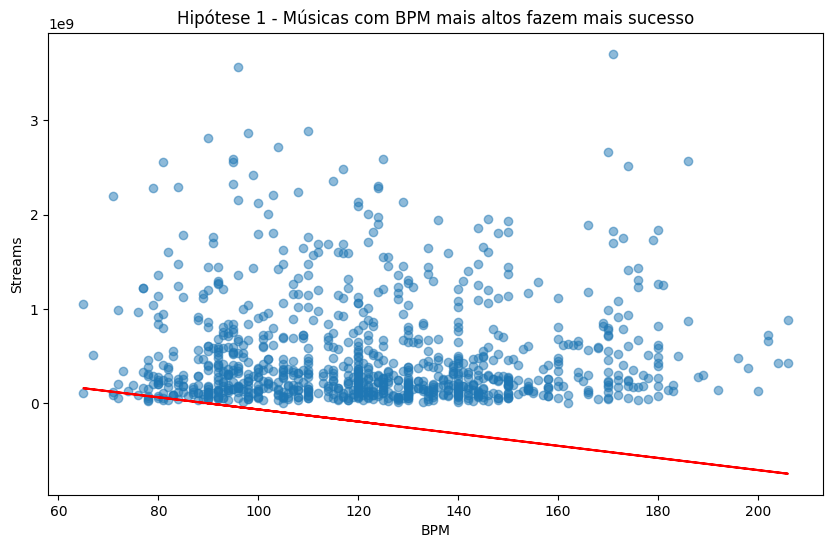

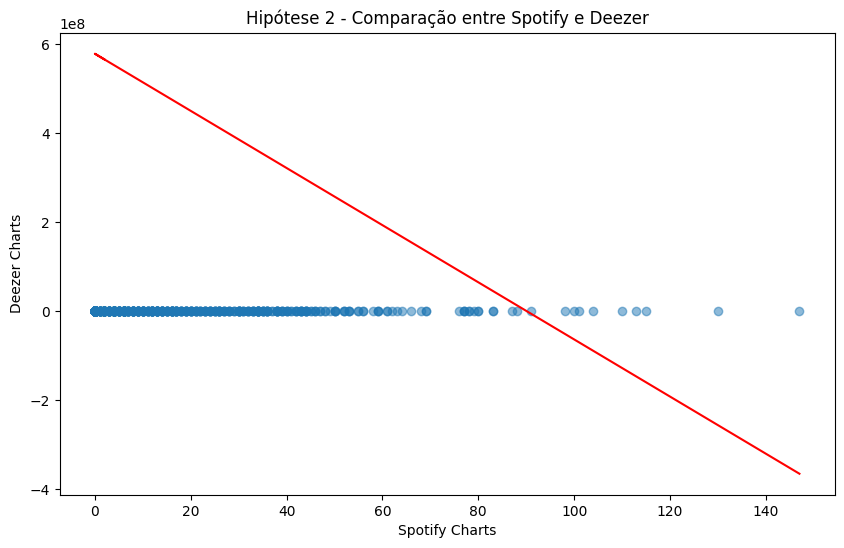

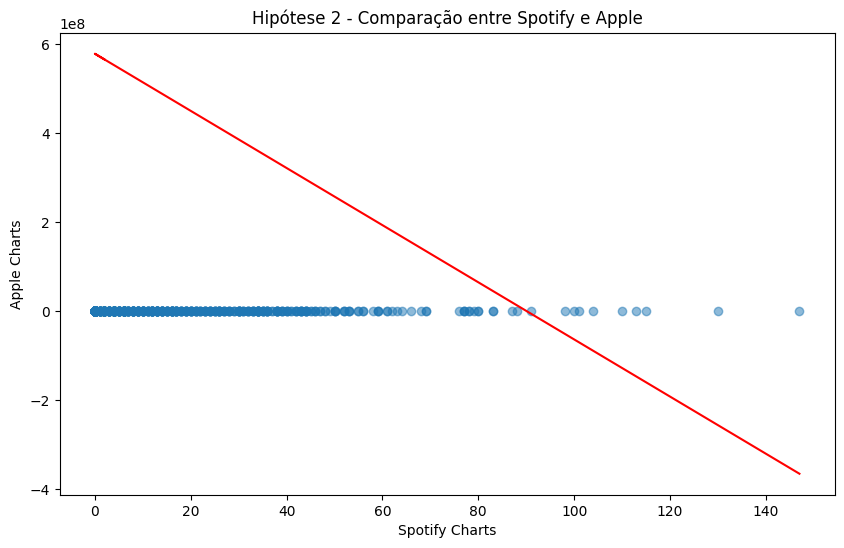

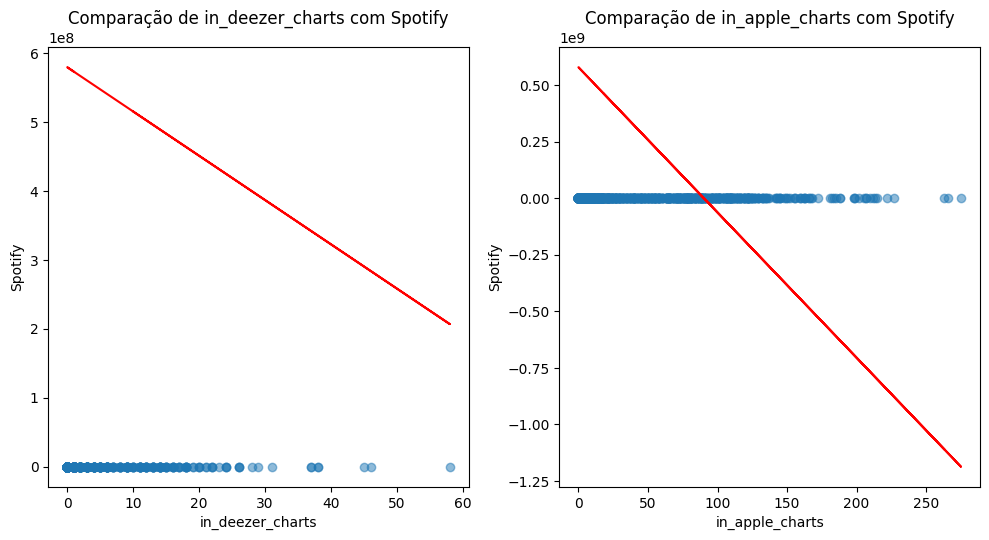

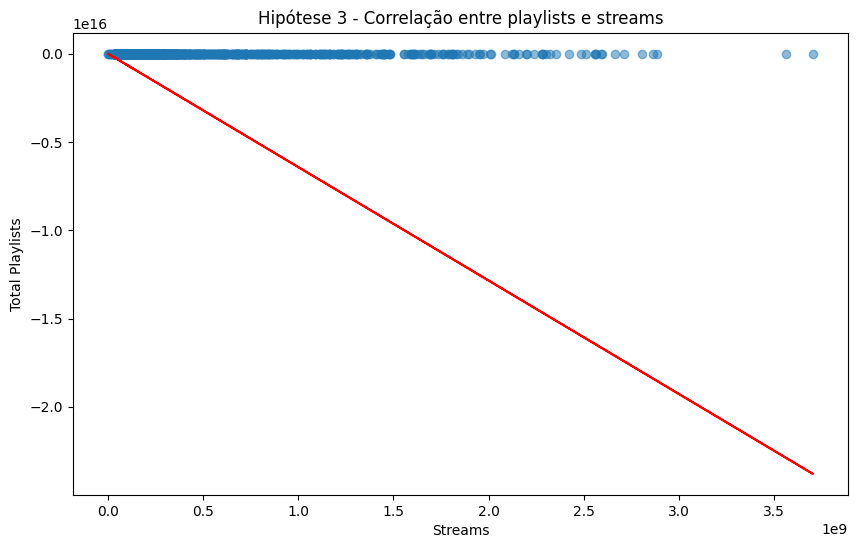

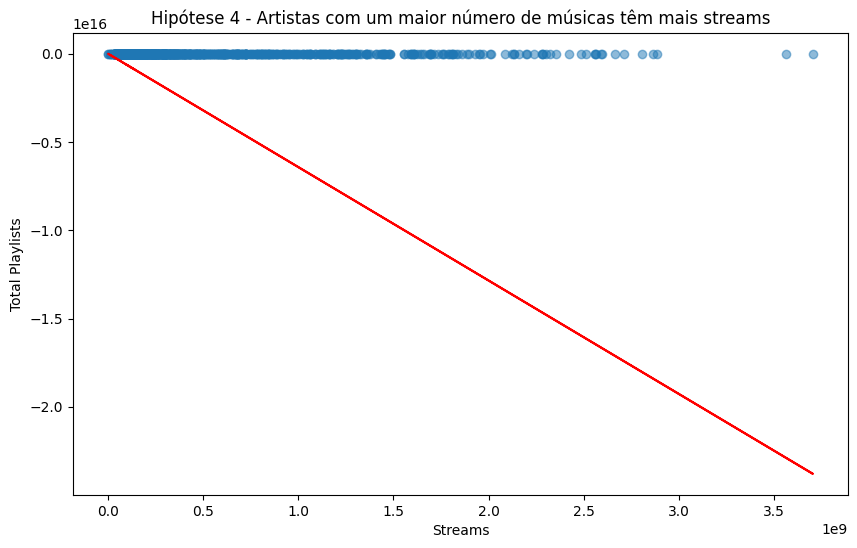

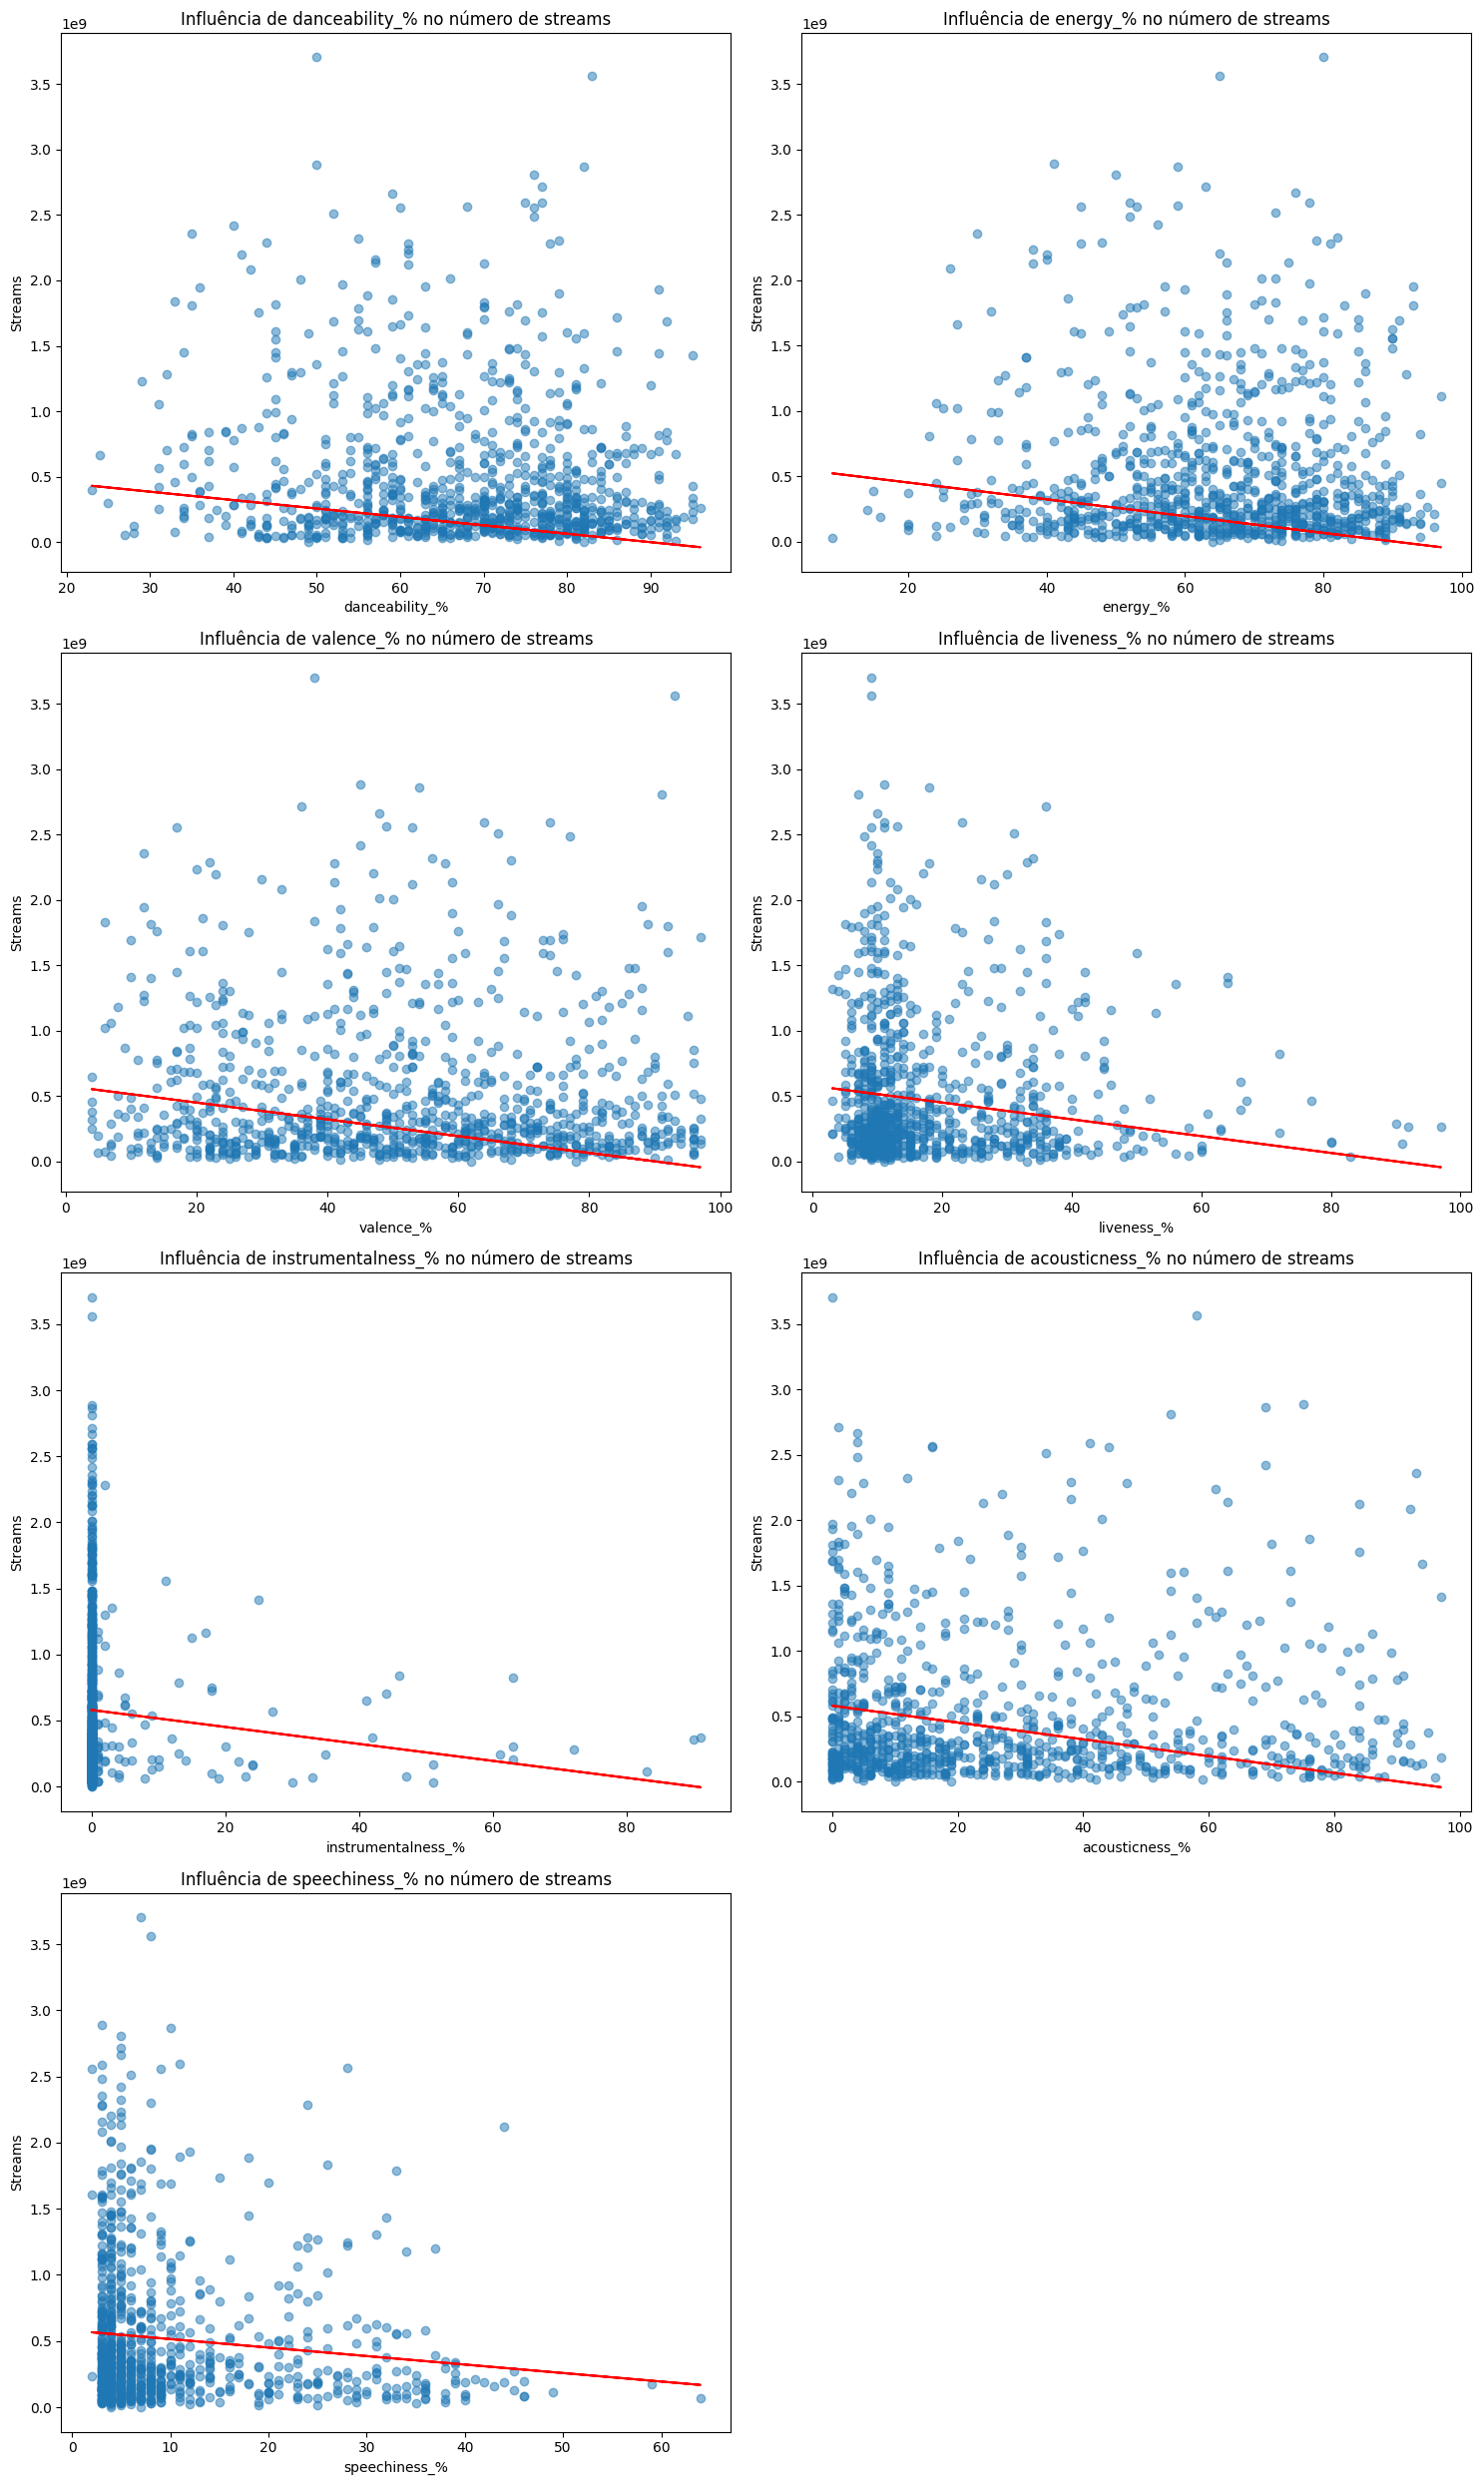

In [22]:
import matplotlib.pyplot as plt # imprtar pacote de grafico

# Hipótese 1 - Músicas com BPM mais altos fazem mais sucesso
plt.figure(figsize=(10, 6))
plt.scatter(merged['bpm'], merged['streams'], alpha=0.5)
plt.plot(merged['bpm'], model.predict(sm.add_constant(merged['bpm'])), color='red')
plt.title('Hipótese 1 - Músicas com BPM mais altos fazem mais sucesso')
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.show()

# Hipótese 2 - Comparação entre Spotify e Deezer
plt.figure(figsize=(10, 6))
plt.scatter(merged['in_spotify_charts'], merged['in_deezer_charts'], alpha=0.5)
plt.plot(merged['in_spotify_charts'], model.predict(sm.add_constant(merged['in_spotify_charts'])), color='red')
plt.title('Hipótese 2 - Comparação entre Spotify e Deezer')
plt.xlabel('Spotify Charts')
plt.ylabel('Deezer Charts')
plt.show()
# Hipótese 2 - Comparação entre Spotify e Apple
plt.figure(figsize=(10, 6))
plt.scatter(merged['in_spotify_charts'], merged['in_apple_charts'], alpha=0.5)
plt.plot(merged['in_spotify_charts'], model.predict(sm.add_constant(merged['in_spotify_charts'])), color='red')
plt.title('Hipótese 2 - Comparação entre Spotify e Apple')
plt.xlabel('Spotify Charts')
plt.ylabel('Apple Charts')
plt.show()

# Hipótese 2 - Comparação entre Spotify, Deezer e Apple
features = ['in_deezer_charts', 'in_apple_charts']
plt.figure(figsize=(10, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    plt.scatter(merged[feature], merged['in_spotify_charts'], alpha=0.5)
    plt.plot(merged[feature], model.predict(sm.add_constant(merged[feature])), color='red')
    plt.title(f'Comparação de {feature} com Spotify')
    plt.xlabel(f'{feature}')
    plt.ylabel('Spotify')
plt.tight_layout()
plt.show()

# Hipótese 3 - Correlação entre playlists e streams
plt.figure(figsize=(10, 6))
plt.scatter(merged['streams'], merged['total_playlists'], alpha=0.5)
plt.plot(merged['streams'], model.predict(sm.add_constant(merged['streams'])), color='red')
plt.title('Hipótese 3 - Correlação entre playlists e streams')
plt.xlabel('Streams')
plt.ylabel('Total Playlists')
plt.show()

# Hipótese 4 - Artistas com um maior número de músicas têm mais streams
plt.figure(figsize=(10, 6))
plt.scatter(merged['streams'], merged['artist_count'], alpha=0.5)
plt.plot(merged['streams'], model.predict(sm.add_constant(merged['streams'])), color='red')
plt.title('Hipótese 4 - Artistas com um maior número de músicas têm mais streams')
plt.xlabel('Streams')
plt.ylabel('Total Playlists')
plt.show()

# Hipótese 5 - Influência das Caracteristicas no número de streams
features = ['danceability_%', 'energy_%', 'valence_%', 'liveness_%', 'instrumentalness_%', 'acousticness_%', 'speechiness_%']

plt.figure(figsize=(15, 25))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    plt.scatter(merged[feature], merged['streams'], alpha=0.5)
    plt.plot(merged[feature], model.predict(sm.add_constant(merged[feature])), color='red')
    plt.title(f'Influência de {feature} no número de streams')
    plt.xlabel(f'{feature}')
    plt.ylabel('Streams')

plt.tight_layout()
plt.show()




**Bonus: O teste de Kruskal-Wallis** é uma extensão do teste de Mann-Whitney U para mais de dois grupos e é usado para determinar se há diferença significativa entre as medianas de três ou mais grupos independentes.

In [ ]:
from scipy.stats import kruskal #importa o teste

# Realiza o teste de Kruskal-Wallis
statistic, p_value = kruskal(merged['in_spotify_charts'], merged['in_deezer_charts'], merged['in_apple_charts'])

# Imprime os resultados
print("Estatística do teste de Kruskal-Wallis:", statistic)
print("Valor-p do teste de Kruskal-Wallis:", p_value)

# Verifica se a diferença é estatisticamente significativa (considerando um nível de significância de 0.05)
if p_value < 0.05:
    print("Há diferença significativa entre as medianas.")
else:
    print("Não há diferença significativa entre as medianas.")


Estatística do teste de Kruskal-Wallis: 972.2444705679819
Valor-p do teste de Kruskal-Wallis: 7.582207853162822e-212
Há diferença significativa entre as medianas.
